In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components

    def fit_transform(self, X):
        # Step 1: Standardize the data
        X = X - np.mean(X, axis=0)
        
        # Step 2: Covariance matrix
        cov_matrix = np.cov(X, rowvar=False)
        
        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Step 4: Sort eigenvectors by eigenvalues (descending)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_idx]
        
        # Step 5: Select top components
        components = eigenvectors[:, :self.n_components]
        
        # Step 6: Project data
        X_reduced = np.dot(X, components)
        
        self.components = components
        return X_reduced

In [4]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        np.random.seed(random_state)

    def fit(self, X):
        # Initialize centroids randomly
        random_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_idx, :]

        for i in range(self.max_iters):
            # Assign clusters
            labels = self._assign_clusters(X)

            # Compute new centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            self.centroids = new_centroids

        self.labels_ = labels
        return self

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)

In [5]:
iris = load_iris()
X = iris.data
y_true = iris.target
X = StandardScaler().fit_transform(X)  # Scale features before PCA

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
labels = kmeans.labels_

/Users/omarelshobky/pytorch-test/env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


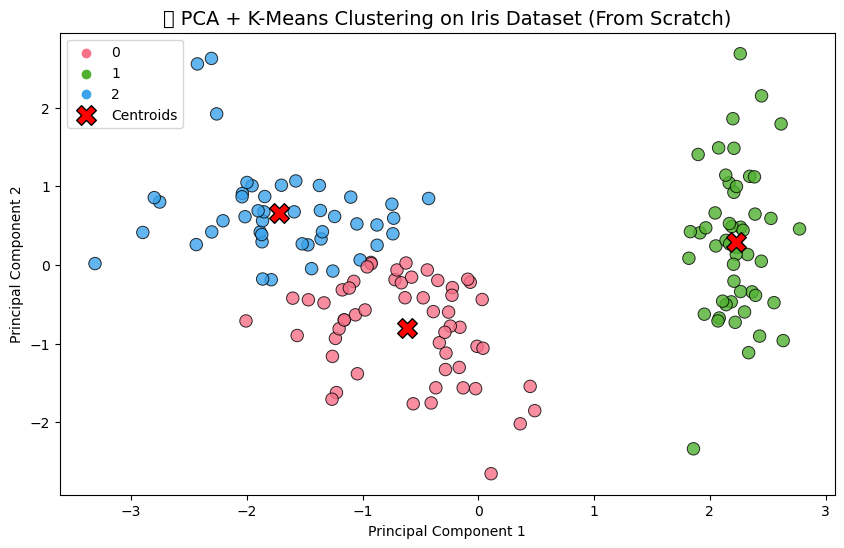

Silhouette Score: 0.511


In [6]:
plt.figure(figsize=(10,6))
palette = sns.color_palette("husl", 3)
sns.scatterplot(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    hue=labels,
    palette=palette,
    s=80,
    alpha=0.8,
    edgecolor='black'
)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', s=200, marker='X', label='Centroids', edgecolor='black')
plt.title("🌸 PCA + K-Means Clustering on Iris Dataset (From Scratch)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

sil_score = silhouette_score(X_reduced, labels)
print(f"Silhouette Score: {sil_score:.3f}")